In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
golf = pd.read_csv("golf.csv")

In [2]:
golf 

,sunny,cloudy,rainy,temperature,humidity,wind,golf
0,1,0,0,1,1,0,0
1,1,0,0,1,1,1,0
2,0,1,0,1,0,0,1
3,0,0,1,0,1,0,1
4,0,0,1,0,0,0,1
5,0,0,1,0,0,1,0
6,0,1,0,0,0,1,1
7,1,0,0,0,1,0,0
8,1,0,0,0,0,0,1
9,0,0,1,1,0,0,1


In [3]:
golf.isna().sum()

sunny          0
cloudy         0
rainy          0
temperature    0
humidity       0
wind           0
golf           0
dtype: int64

In [4]:
golf.info

<bound method DataFrame.info of     sunny  cloudy  rainy  temperature  humidity  wind  golf
0       1       0      0            1         1     0     0
1       1       0      0            1         1     1     0
2       0       1      0            1         0     0     1
3       0       0      1            0         1     0     1
4       0       0      1            0         0     0     1
5       0       0      1            0         0     1     0
6       0       1      0            0         0     1     1
7       1       0      0            0         1     0     0
8       1       0      0            0         0     0     1
9       0       0      1            1         0     0     1
10      1       0      0            1         0     1     1
11      0       1      0            0         1     1     1
12      0       1      0            1         0     0     1
13      0       0      1            0         0     1     0>

In [7]:
golf.head(5)

,sunny,cloudy,rainy,temperature,humidity,wind,golf
0,1,0,0,1,1,0,0
1,1,0,0,1,1,1,0
2,0,1,0,1,0,0,1
3,0,0,1,0,1,0,1
4,0,0,1,0,0,0,1


In [8]:
from sklearn.model_selection import train_test_split

In [10]:
( train_golf, test_golf ) = train_test_split( golf , test_size=0.3, random_state=17130 )

In [11]:
train_golf.head(5)
train_golf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 1 to 7
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   sunny        9 non-null      int64
 1   cloudy       9 non-null      int64
 2   rainy        9 non-null      int64
 3   temperature  9 non-null      int64
 4   humidity     9 non-null      int64
 5   wind         9 non-null      int64
 6   golf         9 non-null      int64
dtypes: int64(7)
memory usage: 576.0 bytes


In [12]:
train_y = train_golf["golf"]	# 目的変数（学習用）
test_y = test_golf["golf"]

In [13]:
train_x = train_golf[["sunny", "cloudy", "rainy","temperature","humidity","wind"]]
test_x = test_golf[["sunny", "cloudy", "rainy","temperature","humidity","wind"]]

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier( max_depth=3 )

In [15]:
dtc.fit( train_x, train_y )

DecisionTreeClassifier(max_depth=3)

[Text(523.125, 380.52, 'cloudy <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]\nclass = 1'),
 Text(418.5, 271.8, 'humidity <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = 0'),
 Text(209.25, 163.07999999999998, 'temperature <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = 1'),
 Text(104.625, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(313.875, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(627.75, 163.07999999999998, 'sunny <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = 0'),
 Text(523.125, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(732.375, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(627.75, 271.8, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = 1')]

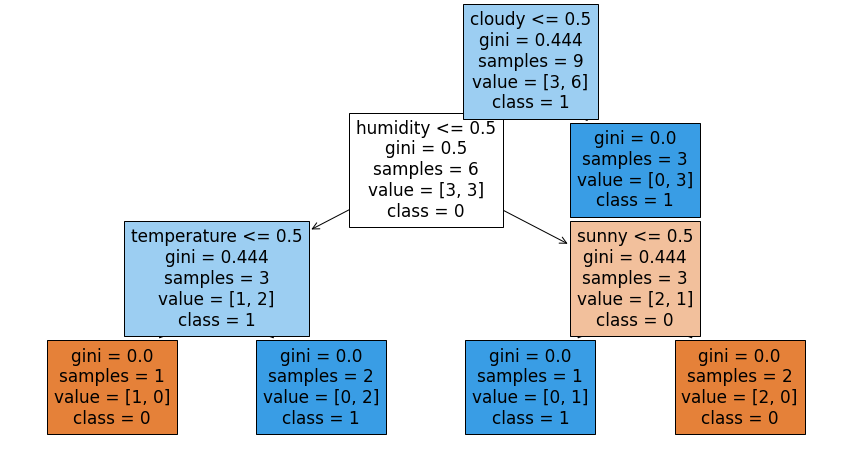

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))  # グラフのサイズを調整

plot_tree(dtc, # 決定木オブジェクト（ DecisionTreeClassifier クラス）
          feature_names=train_x.columns, # 説明変数のラベル
          class_names=["0", "1"], # 目的変数の各水準のラベル
          filled=True  # ノードの色を塗る（色とその濃さでどちらの水準が多いかを示す）
         )


In [17]:
pred_dtc = dtc.predict(test_x)

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score( test_y,  pred_dtc )

0.6

In [19]:
from sklearn.metrics import f1_score

f1_score( test_y,  pred_dtc )

0.5